In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
iris = pd.read_csv("assignment6-dataset.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [207]:
iris.drop(columns=["Id"], inplace=True)

In [208]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [209]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [210]:
le = LabelEncoder()
iris["Species"] = le.fit_transform(iris["Species"])

In [211]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [212]:
x = iris.iloc[:, 0:-1].values
y = iris.iloc[:, -1].values

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [214]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [215]:
model = GaussianNB()

In [216]:
model.fit(x_train, y_train)

GaussianNB()

In [217]:
y_pred = model.predict(x_test)

In [228]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [220]:
accuracy_score(y_test, y_pred)*100

97.77777777777777

In [224]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

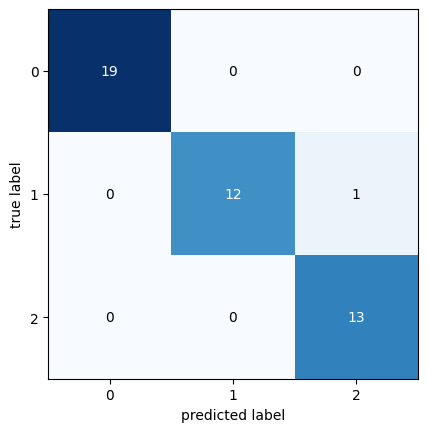

In [226]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [234]:
cm = np.array(cm)   
TP = np.diag(cm)  # Diagonal elements represent true positives
FN = cm.sum(axis=1) - TP  # Row sum - diagonal (correctly classified)
FP = cm.sum(axis=0) - TP  # Column sum - diagonal (correctly classified)
TN = cm.sum() - (TP + FN + FP)  # Total - sum of all others

# Print the results
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)

True Positives (TP): [19 12 13]
False Negatives (FN): [0 1 0]
False Positives (FP): [0 0 1]
True Negatives (TN): [26 32 31]


In [229]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19.0},
 '1': {'precision': 1.0,
  'recall': 0.9230769230769231,
  'f1-score': 0.96,
  'support': 13.0},
 '2': {'precision': 0.9285714285714286,
  'recall': 1.0,
  'f1-score': 0.9629629629629629,
  'support': 13.0},
 'accuracy': 0.9777777777777777,
 'macro avg': {'precision': 0.9761904761904763,
  'recall': 0.9743589743589745,
  'f1-score': 0.974320987654321,
  'support': 45.0},
 'weighted avg': {'precision': 0.9793650793650793,
  'recall': 0.9777777777777777,
  'f1-score': 0.9777448559670782,
  'support': 45.0}}